In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir='/content/drive/MyDrive/Brain_tumor/Training'
image_list,label_list=[],[]
all_labels=['glioma','meningioma','notumor','pituitary']
bin_labl=[0,1,2,3]
temp=-1
image_ext=['jpeg','jpg','png']

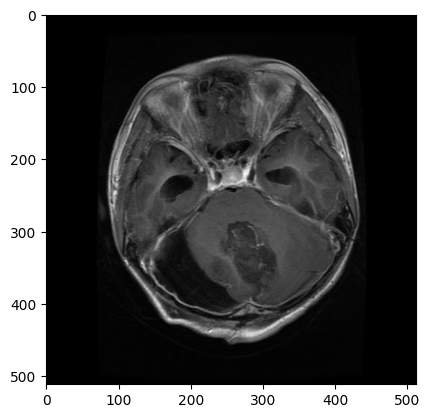

In [ ]:
img=cv2.imread(os.path.join('Data','Testing','/content/drive/MyDrive/Brain_tumor/Testing/glioma/Te-glTr_0000.jpg'))
# img.shape
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
from PIL import Image
import os

# def resize_images_in_folder(folder_path, target_size=(256, 256)):
#     for filename in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, filename)

#         try:
#             img = Image.open(img_path)

#             # Convert image to RGB mode if it's in the 'P' mode
#             if img.mode != 'RGB':
#                 img = img.convert('RGB')

#             img_resized = img.resize(target_size)
#             img_resized.save(img_path)
#         except Exception as e:
#             print(f"Error processing {img_path}: {e}")

# # Replace 'folder1', 'folder2', 'folder3', and 'folder4' with your actual folder paths
# folders = ['/content/drive/MyDrive/Brain_tumor/Training/glioma',
#            '/content/drive/MyDrive/Brain_tumor/Training/meningioma',
#            '/content/drive/MyDrive/Brain_tumor/Training/notumor',
#            '/content/drive/MyDrive/Brain_tumor/Training/pituitary']

# for folder in folders:
#     resize_images_in_folder(folder)


In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 5694 files belonging to 4 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()
data_iterator

In [ ]:
batch=data_iterator.next()
batch[1]

array([3, 3, 0, 3, 1, 3, 0, 1, 0, 1, 3, 1, 0, 3, 3, 3, 2, 3, 3, 1, 2, 0,
       2, 0, 2, 1, 3, 1, 2, 2, 1, 2], dtype=int32)

In [ ]:
from PIL import Image
def convert_image_to_array(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

In [ ]:
# import PIL
for dir in all_labels:
  brn_img_list=os.listdir(f"{data_dir}/{dir}/")
  temp+=1
  for files in brn_img_list:
    try:
      img_path=f"{data_dir}/{dir}/{files}"
      image_list.append(convert_image_to_array(img_path))
      label_list.append(bin_labl[temp])
    except:
        print(f"Error opening image at {img_path}")

Error opening image at /content/drive/MyDrive/Brain_tumor/Training/pituitary/Tr-pi_1119.jpg


In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd

label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()
#0-glioma, 1-meningioma, 2-notumor, 3-pituitary

2    1595
3    1466
1    1349
0    1321
dtype: int64

In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)


In [ ]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="softmax"))
# model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=10)


In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=18,validation_data=(x_val,y_val))

Epoch 1/18
29/29 [==============================] - 25s 332ms/step - loss: 0.5290 - accuracy: 0.3232 - val_loss: 0.4689 - val_accuracy: 0.3937
Epoch 2/18
29/29 [==============================] - 4s 142ms/step - loss: 0.4090 - accuracy: 0.5113 - val_loss: 0.3766 - val_accuracy: 0.6107
Epoch 3/18
29/29 [==============================] - 5s 171ms/step - loss: 0.3376 - accuracy: 0.7273 - val_loss: 0.3394 - val_accuracy: 0.7219
Epoch 4/18
29/29 [==============================] - 4s 145ms/step - loss: 0.2834 - accuracy: 0.8077 - val_loss: 0.2863 - val_accuracy: 0.8222
Epoch 5/18
29/29 [==============================] - 4s 143ms/step - loss: 0.2441 - accuracy: 0.8331 - val_loss: 0.2612 - val_accuracy: 0.8179
Epoch 6/18
29/29 [==============================] - 5s 169ms/step - loss: 0.2088 - accuracy: 0.8609 - val_loss: 0.2302 - val_accuracy: 0.8495
Epoch 7/18
29/29 [==============================] - 5s 157ms/step - loss: 0.1810 - accuracy: 0.8852 - val_loss: 0.2291 - val_accuracy: 0.8571
Epoch

In [ ]:
history.history

{'loss': [0.5290265083312988,
  0.40902283787727356,
  0.3376031816005707,
  0.2834399938583374,
  0.24407970905303955,
  0.20877565443515778,
  0.18098978698253632,
  0.16449393332004547,
  0.14128540456295013,
  0.11437149345874786,
  0.09999741613864899,
  0.09177246689796448,
  0.07367851585149765,
  0.06985525041818619,
  0.05243822559714317,
  0.050524186342954636,
  0.04126453027129173,
  0.04205550253391266],
 'accuracy': [0.32315245270729065,
  0.5113171339035034,
  0.7272975444793701,
  0.8077447414398193,
  0.8331061005592346,
  0.8609217405319214,
  0.8851922750473022,
  0.8952822685241699,
  0.9157349467277527,
  0.9372784495353699,
  0.9460049271583557,
  0.9495500326156616,
  0.961548924446106,
  0.9618216753005981,
  0.9757294654846191,
  0.9760021567344666,
  0.9817289113998413,
  0.9800927042961121],
 'val_loss': [0.4689309895038605,
  0.3766232430934906,
  0.339389443397522,
  0.28630703687667847,
  0.2612224519252777,
  0.23018236458301544,
  0.22905084490776062,
  

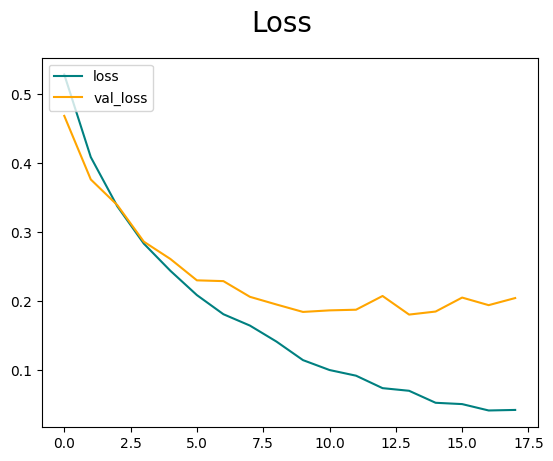

In [ ]:
#plot performance
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Model_save/bt.h5")

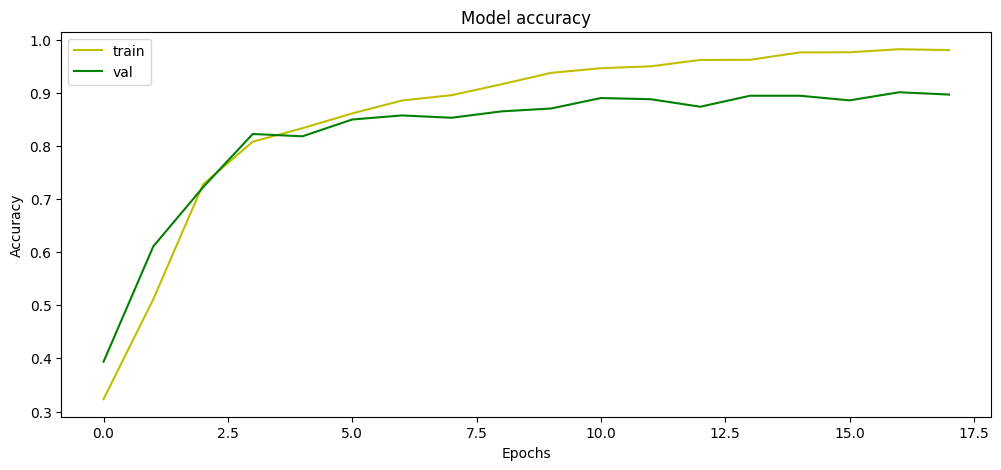

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='y')
plt.plot(history.history['val_accuracy'],color='g')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [ ]:
print("Calculating model accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy :{scores[1]*100}")

Calculating model accuracy
36/36 [==============================] - 2s 30ms/step - loss: 0.2167 - accuracy: 0.8971
Test Accuracy :89.71229195594788


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
img=cv2.imread('/content/drive/MyDrive/Brain_tumor/Training/meningioma/Tr-meTr_0005.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

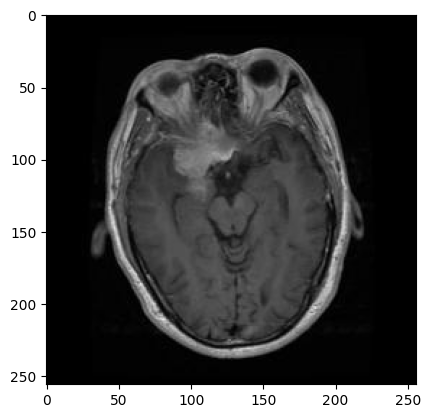

In [ ]:
resz=tf.image.resize(img,(256,256))
plt.imshow((resz.numpy().astype(int)))
plt.show()

In [ ]:
import numpy as np
np.expand_dims(resz,0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [ ]:
yhat=model.predict(np.expand_dims(resz/255,0))
yhat

NameError: ignored

In [ ]:
from keras.models import load_model
new_model=load_model(os.path.join('/content/drive/MyDrive/Model_save','bt.h5'))

In [ ]:
final=new_model.predict(np.expand_dims(resz/255,0))

In [ ]:
final.tolist()

[[0.0021531726233661175,
  0.5621208548545837,
  0.3565339148044586,
  0.07919204235076904]]

In [ ]:
lst=final[0]
max1=max(lst)
def ind(lst):
  for i in range(4):
    if(max1==lst[i]):
      return i
k=ind(lst)

In [ ]:

if k==0:
  print("Person is diagnozed with glioma")
elif k==1:
  print("Person is diagnozed with Meningioma")
elif k==3:
  print("Person is diagnozed with Pituitary tumor")
else:
  print("Person is not affected by brain tumor")

Person is diagnozed with Meningioma
